In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np

dt=pd.read_csv("/Users/Wang/source/IE517/hw4/housing.csv")
dt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


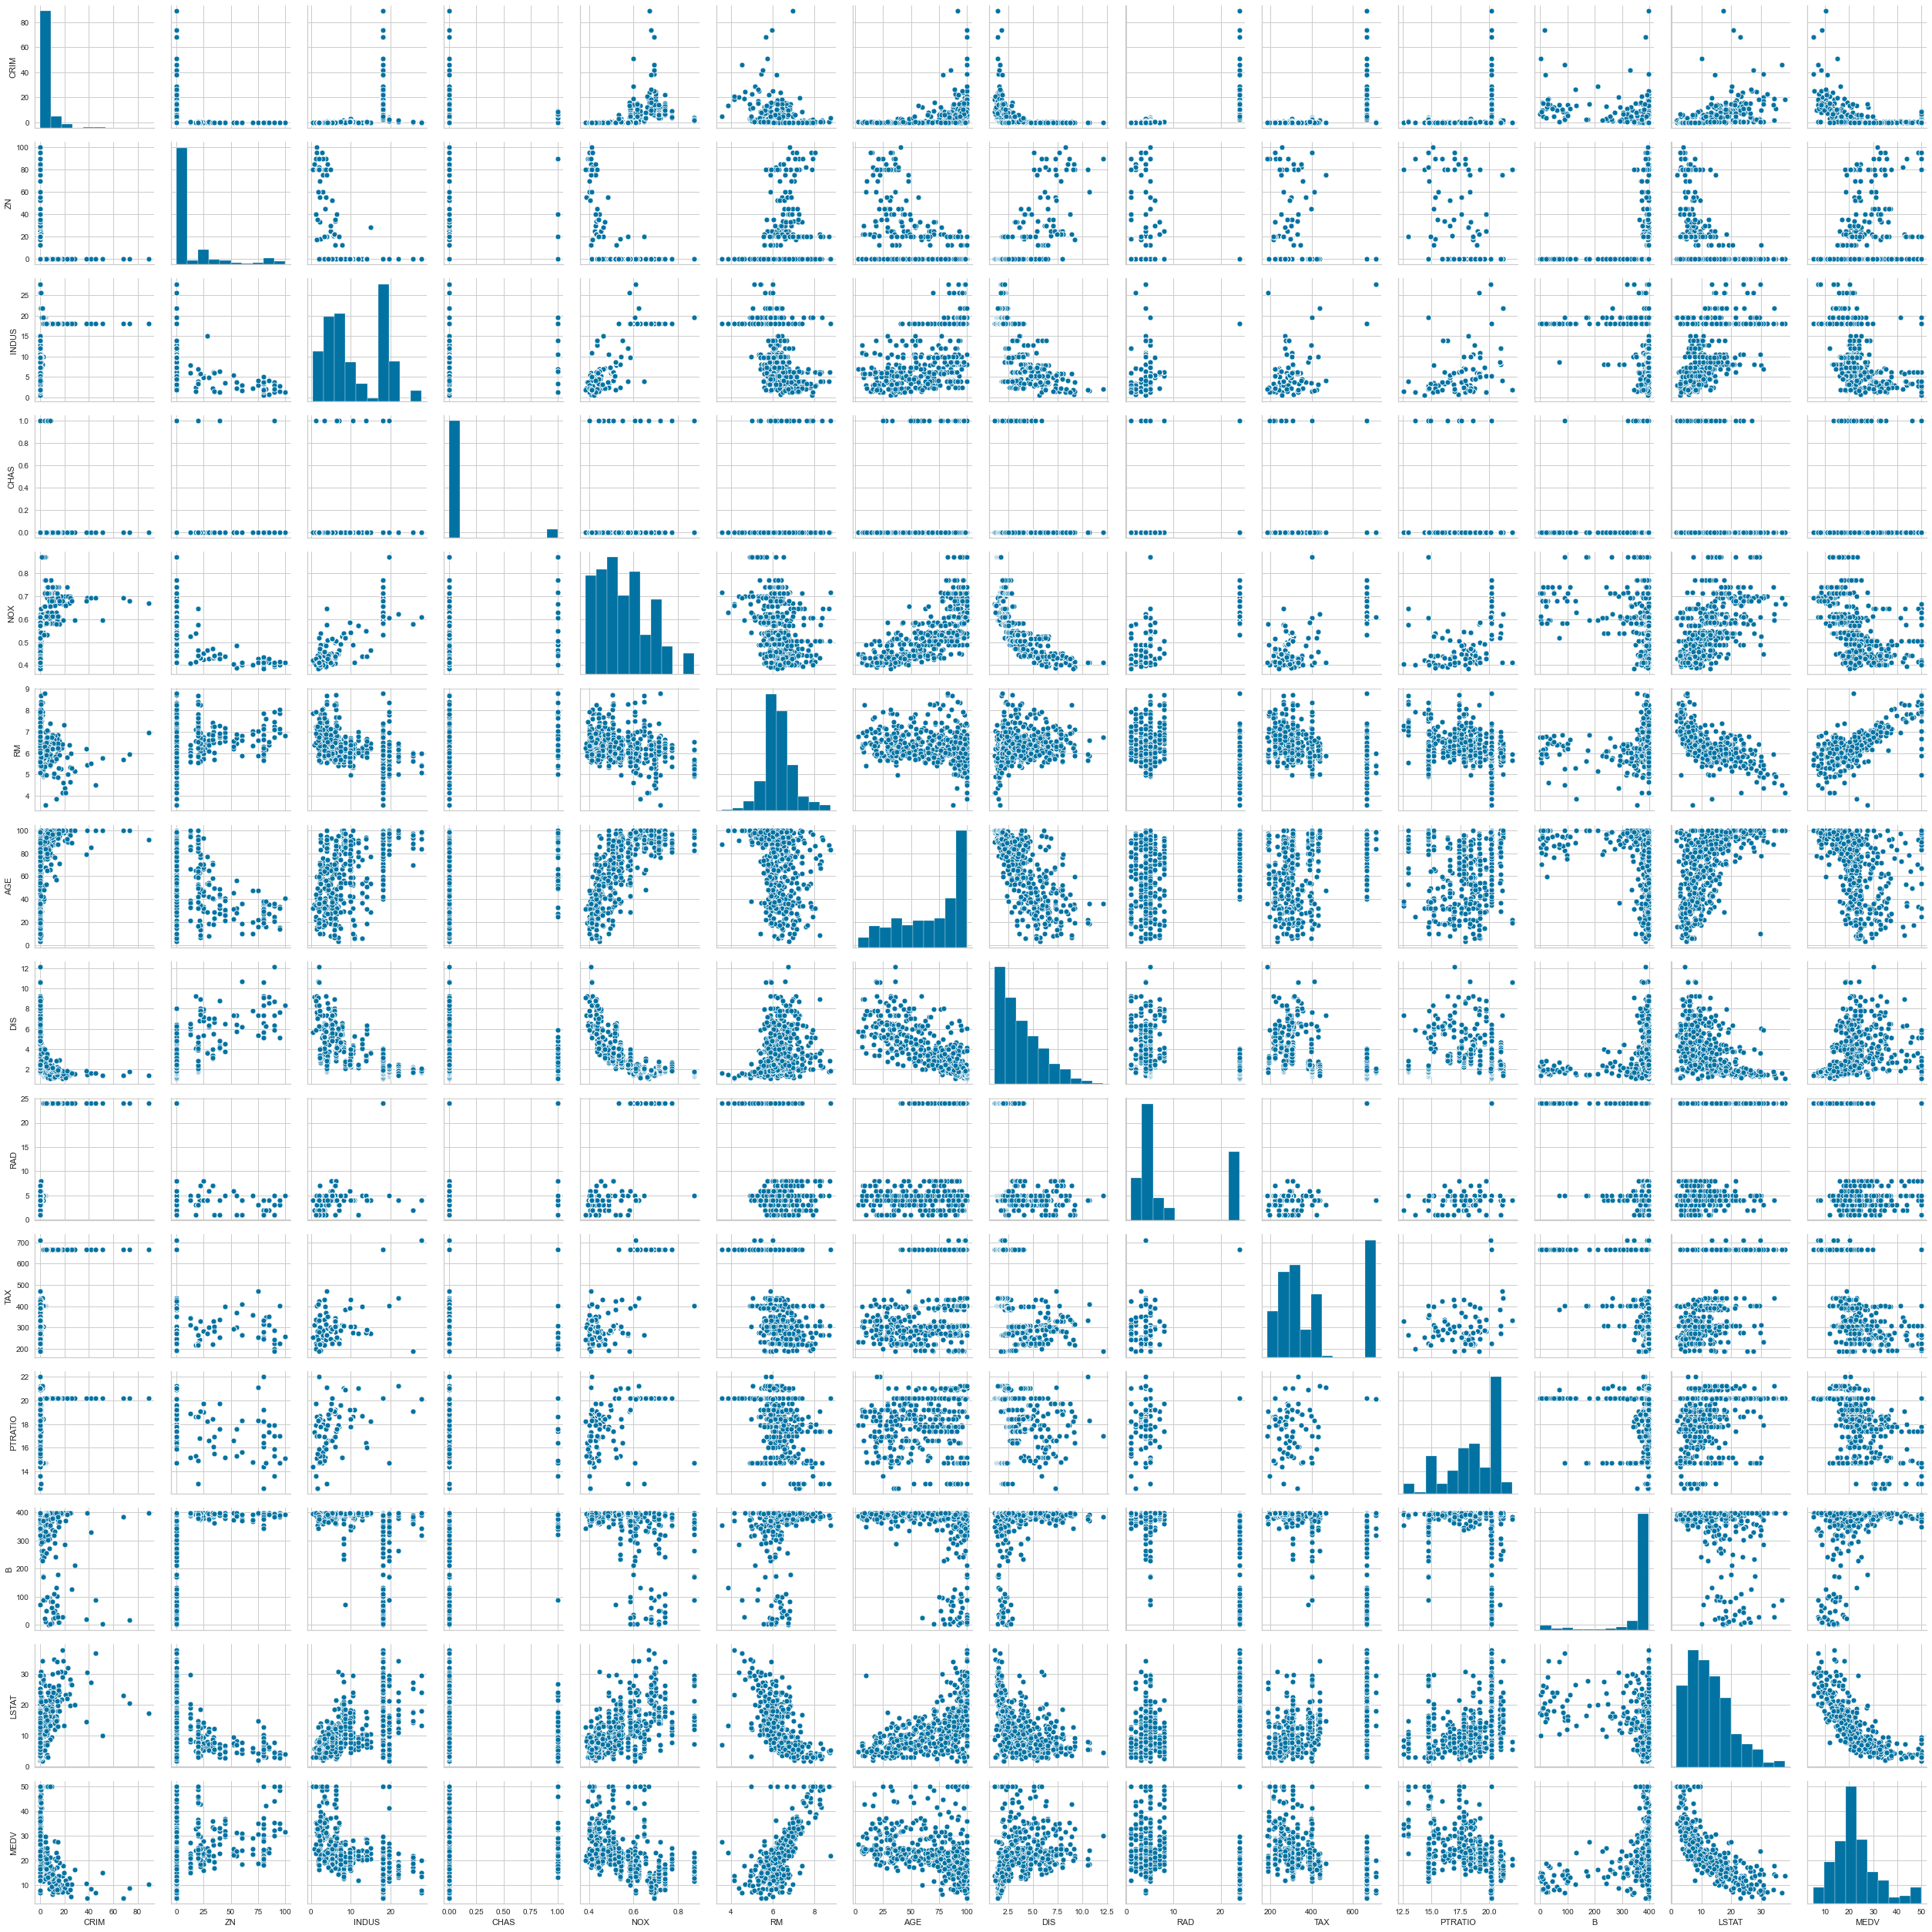

In [140]:
cols=['MEDV','LSTAT','RM','DIS','CRIM']
sns.pairplot(dt,height=2.5)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

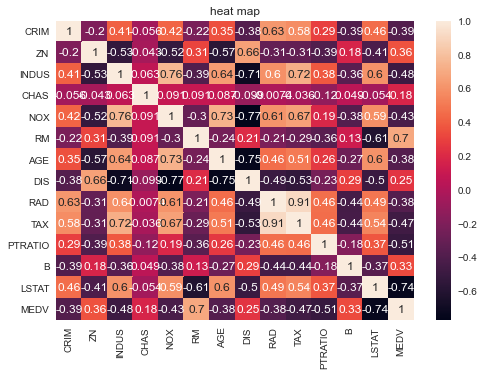

In [138]:
# Plot heatmap of correlation matrix
corMat=DataFrame(dt.corr())
sns.heatmap(corMat,annot=True)
plt.title('heat map')
plt.show

In [82]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=dt.iloc[:, :-1].values
y=dt['MEDV'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

#standardize
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

#fit
slr=LinearRegression()
slr.fit(X_train_std,y_train)
y_train_pred=slr.predict(X_train_std)
y_test_pred=slr.predict(X_test_std)

In [85]:
slr.fit(X_train,y_train)
print('slope:%.3f'%slr.coef_[0])
print('intercept:%.3f'%slr.intercept_)
slr.fit(X_train_std,y_train)
print('slope:%.3f'%slr.coef_[0])
print('intercept:%.3f'%slr.intercept_)

slope:-0.113
intercept:30.247
slope:-1.002
intercept:22.797


<function matplotlib.pyplot.show(close=None, block=None)>

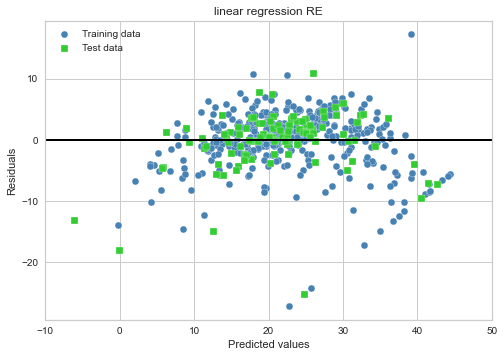

In [86]:
#residual error
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.title('linear regression RE')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show

In [168]:
#MSE
from sklearn.metrics import mean_squared_error
print('MSE train:%.5f,test:%.5f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train:21.64164,test:24.29991


In [167]:
#R2
from sklearn.metrics import r2_score
print('R^2 train:%.5f,test:%.5f'%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train:0.75088,test:0.66864


slope:-0.96491
intercept:22.79653
MSE train:21.66017,test:24.37831
R^2 train:0.75067,test:0.66757
The best alpha is: 0.001


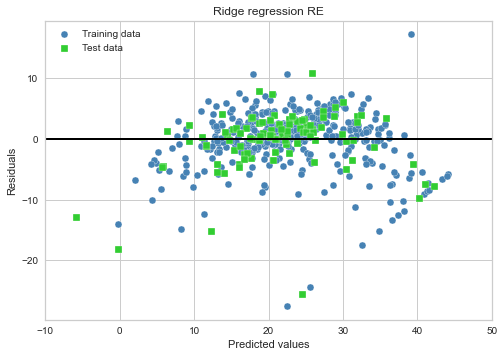

In [175]:
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import RidgeCV




sr=Ridge(alpha=0.01,normalize=True)
sr.fit(X_train_std, y_train)
y_train_pred=sr.predict(X_train_std)
y_test_pred=sr.predict(X_test_std)
print('slope:%.5f'%sr.coef_[0])
print('intercept:%.5f'%sr.intercept_)
#residual error
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.title('Ridge regression RE')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show
#MSE
print('MSE train:%.5f,test:%.5f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
#R2
print('R^2 train:%.5f,test:%.5f'%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))



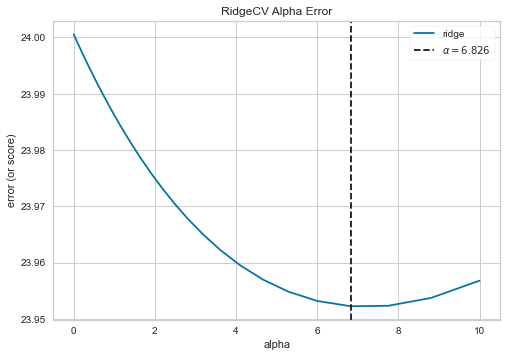

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

slope:-0.10678
intercept:28.78628
MSE train:21.67011,test:24.39495
R^2 train:0.75056,test:0.66734


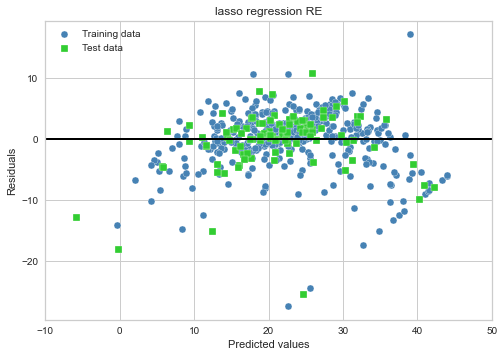

In [190]:
#Lasso regression
from sklearn.linear_model import Lasso
sl=Lasso(alpha=0.001,normalize=True)
sl.fit(X_train, y_train)
y_train_pred=sl.predict(X_train)
y_test_pred=sl.predict(X_test)
print('slope:%.5f'%sl.coef_[0])
print('intercept:%.5f'%sl.intercept_)

#residual error
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.title('lasso regression RE')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show
#MSE
print('MSE train:%.5f,test:%.5f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
#R2
print('R^2 train:%.5f,test:%.5f'%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))



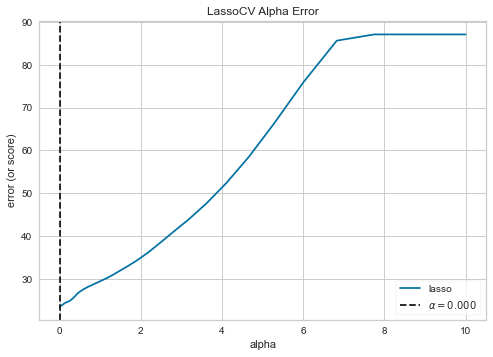

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

The best alpha is: 7
